 # 1) Delivery_time -> Predict delivery time using sorting time 

  * Build a simple linear regression model by performing EDA and do necessary transformations 
  * and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
delivery=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Simple Linear Regression\\delivery_time.csv",encoding='latin1')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Independent variable(x) - Sorting Time , Target variable(y) - Delivery time

# EDA and Visualization

In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
np.round(delivery.describe(),2)

,Delivery Time,Sorting Time
count,21.00,21.00
mean,16.79,6.19
std,5.07,2.54
min,8.00,2.00
25%,13.50,4.00
50%,17.83,6.00
75%,19.75,8.00
max,29.00,10.00


In [5]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
delivery.shape

(21, 2)

In [7]:
# Check for null values

delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Renaming Columns

In [8]:
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

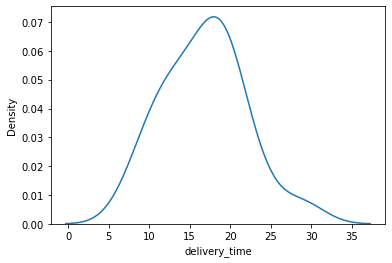

In [9]:
# Draw Distribution plot to check whether the values follow normal distribution or not.

sns.distplot(delivery['delivery_time'],hist=False)

# the graph is not normally distributed.

In [10]:
delivery['delivery_time'].skew()
# positive skewness .

0.3523900822831107

In [11]:
delivery['delivery_time'].kurtosis()

# as the value is less than 3 , there is less no of outliers.

0.31795982942685397

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

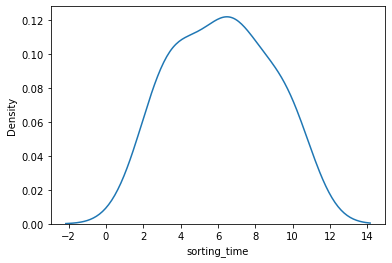

In [12]:
sns.distplot(delivery['sorting_time'],hist=False)

In [13]:
delivery['sorting_time'].skew()
# positive skewness .

0.047115474210530174

In [14]:
delivery['sorting_time'].kurtosis()
# as the value is less than 3 , there is less no of outliers.

-1.14845514534878

<AxesSubplot:xlabel='delivery_time'>

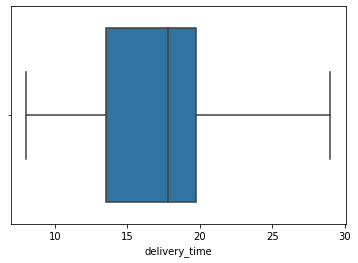

In [15]:
# Draw Box plot to check whether there is any outliers are available or not.

sns.boxplot(delivery['delivery_time'])

# There is no outliers available

<AxesSubplot:xlabel='sorting_time'>

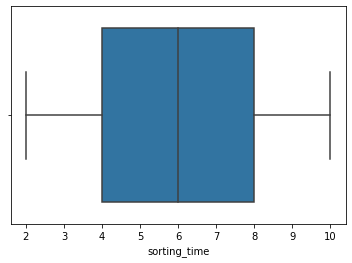

In [16]:
sns.boxplot(delivery['sorting_time'])
# There is no outliers available

In [17]:
# Correlation Analysis

delivery.corr()

# From table we can say that delivery_time and sorting_time are positively correlated , near to 1.
# +1  -  highly correlated(Positive association) , -1 = Highly Correlated(Negative association), 
# both indicated perfect linear relationship
# if delivery_time increases sorting_time also increases.
# 0.80 - 1.0 = Strong Correlation.

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


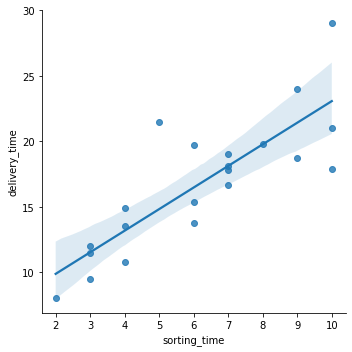

In [18]:
sns.lmplot(x='sorting_time',y='delivery_time',data=delivery)

# Drawn Line plot to check the Linearity test.
# From the pot below ,many data points are not falling onto the linear line 


# Building Simple Linear Regression Model

In [19]:
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()

# Model Testing

In [20]:
# Finding Coefficient parameters (Slope and Sorting_time)
# Intercept = Slope

model.params


Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
# Finding tvalues and pvalues
np.round(model.tvalues) , np.round(model.pvalues)

(Intercept       4.0
 sorting_time    6.0
 dtype: float64,
 Intercept       0.0
 sorting_time    0.0
 dtype: float64)

In [22]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# As the rsquared values is very less , need to do more transformation . 

# 1) Apply Logarithm Data Transformation 

In [23]:
delivery['Log_time']=np.log(delivery['sorting_time'])
delivery.head()

,delivery_time,sorting_time,Log_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


# Iteration 1 

In [24]:
# model building 

model1 = smf.ols("delivery_time~Log_time",data=delivery).fit()

In [25]:
model1.pvalues , model1.rsquared , model1.rsquared_adj

# rsquared values is till low.

(Intercept    0.641980
 Log_time     0.000003
 dtype: float64,
 0.6954434611324223,
 0.6794141696130761)

In [26]:
# model building 

model2 = smf.ols("delivery_time~Log_time+sorting_time",data=delivery).fit()


In [27]:
model2.pvalues , model2.rsquared , model2.rsquared_adj

# rsquared values is till low.

(Intercept       0.563078
 Log_time        0.344287
 sorting_time    0.695650
 dtype: float64,
 0.698094052591083,
 0.6645489473234256)

# 2) Apply Square transformation 

In [28]:
delivery['square']=(delivery['sorting_time'])**(1/2)
delivery.head()

,delivery_time,sorting_time,Log_time,square
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278


# Iteration 2 

In [29]:
# model building 

model3 = smf.ols("delivery_time~square",data=delivery).fit()


In [30]:
model3.pvalues , model3.rsquared , model3.rsquared_adj
# rsquared values is till low.

(Intercept    0.410857
 square       0.000003
 dtype: float64,
 0.695806227630867,
 0.6797960290851232)

# Iteration 3 

In [31]:
# model building 

model4 = smf.ols("delivery_time~square+sorting_time",data=delivery).fit()


In [32]:
model4.pvalues , model4.rsquared , model4.rsquared_adj
# rsquared values is till low.

(Intercept       0.654175
 square          0.359859
 sorting_time    0.782565
 dtype: float64,
 0.6971267163415128,
 0.6634741292683475)

# 3) Apply Exponential Log Transformation 

In [33]:
delivery['Expo_log']=delivery['sorting_time']*(1/1.2)
delivery.head()

,delivery_time,sorting_time,Log_time,square,Expo_log
0,21.00,10,2.302585,3.162278,8.333333
1,13.50,4,1.386294,2.000000,3.333333
2,19.75,6,1.791759,2.449490,5.000000
3,24.00,9,2.197225,3.000000,7.500000
4,29.00,10,2.302585,3.162278,8.333333


# Iteration 4 

In [34]:
# model building 

model5 = smf.ols("delivery_time~Expo_log",data=delivery).fit()


In [35]:
model5.rsquared , model5.rsquared_adj
# rsquared values is till low.

(0.6822714748417231, 0.6655489208860244)

# Iteration 5 

In [36]:
# model building 

model6 = smf.ols("delivery_time~Expo_log+sorting_time",data=delivery).fit()

In [37]:
model6.rsquared , model6.rsquared_adj
# rsquared values is till low.

(0.6822714748417231, 0.6655489208860244)

# Since the r-sqaured values is not getting improvement , go with model deletion technique

# 1.Cook Distance 

In [38]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance


Text(0, 0.5, 'Cook distance')

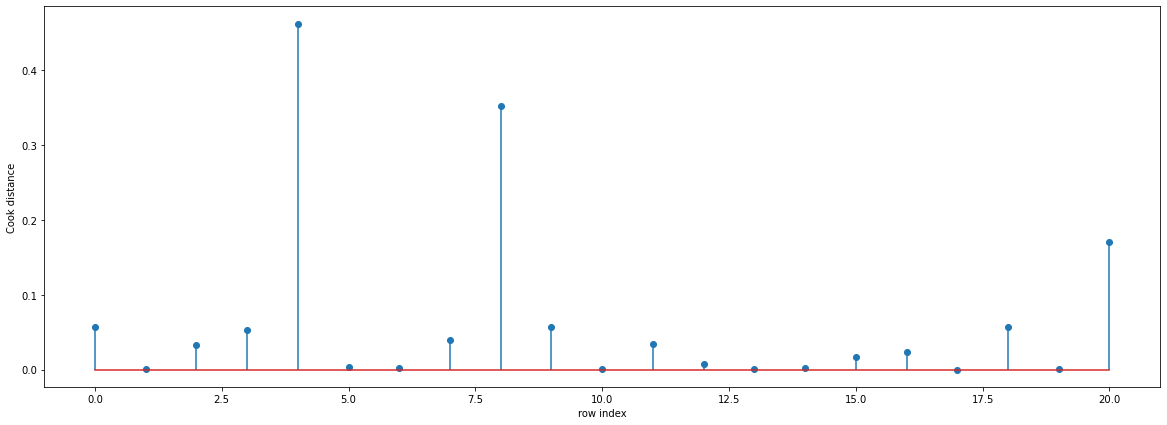

In [39]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(delivery)),np.round(c,6))
plt.xlabel('row index')
plt.ylabel('Cook distance')

In [40]:
np.argmax(c),np.max(c)

(4, 0.4620530412650316)

In [41]:
delivery1=delivery.drop(4)


In [42]:
delivery2=delivery1.reset_index()
delivery2.head()

,index,delivery_time,sorting_time,Log_time,square,Expo_log
0,0,21.00,10,2.302585,3.162278,8.333333
1,1,13.50,4,1.386294,2.000000,3.333333
2,2,19.75,6,1.791759,2.449490,5.000000
3,3,24.00,9,2.197225,3.000000,7.500000
4,5,15.35,6,1.791759,2.449490,5.000000


In [43]:
delivery2 = delivery2.drop(['index'],axis=1)

In [44]:
delivery2.head()

,delivery_time,sorting_time,Log_time,square,Expo_log
0,21.00,10,2.302585,3.162278,8.333333
1,13.50,4,1.386294,2.000000,3.333333
2,19.75,6,1.791759,2.449490,5.000000
3,24.00,9,2.197225,3.000000,7.500000
4,15.35,6,1.791759,2.449490,5.000000


# Iteration 6 

In [45]:
model7=smf.ols("delivery_time~sorting_time",data=delivery2).fit()

In [46]:
model7.rsquared , model7.rsquared_adj

# till the rsquared values is not increased.

(0.660207261776224, 0.6413298874304587)

In [47]:
(c,_)=model7.get_influence().cooks_distance


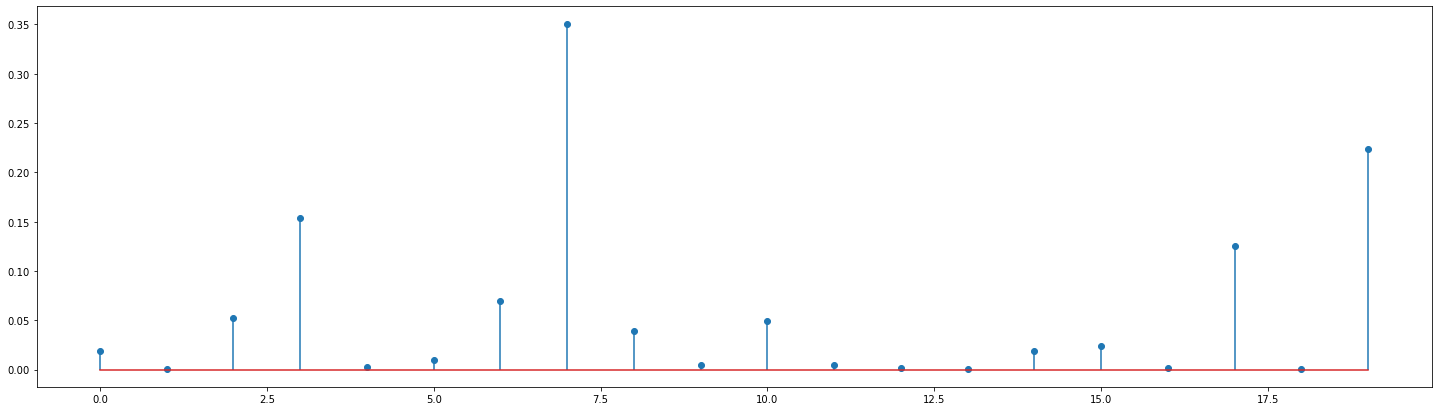

In [48]:
plt.figure(figsize=(25,7))
plt.stem(np.arange(len(delivery2)),np.round(c,6))
plt.show()

In [49]:
np.argmax(c),np.max(c)

(7, 0.3508974803877879)

In [50]:
# delete the 7 element 
delivery3=delivery2.drop(7)

In [51]:
delivery3=delivery3.reset_index()

In [52]:
delivery3 = delivery3.drop(['index'],axis=1)

# Iteration 7 

In [53]:
model8=smf.ols("delivery_time~sorting_time",data=delivery3).fit()

In [54]:
model8.rsquared , model8.rsquared_adj

(0.714075554704391, 0.6972564696870023)

In [55]:
# now the rsqaured value has increased to 71 

In [56]:
(c2,_)=model8.get_influence().cooks_distance

<StemContainer object of 3 artists>

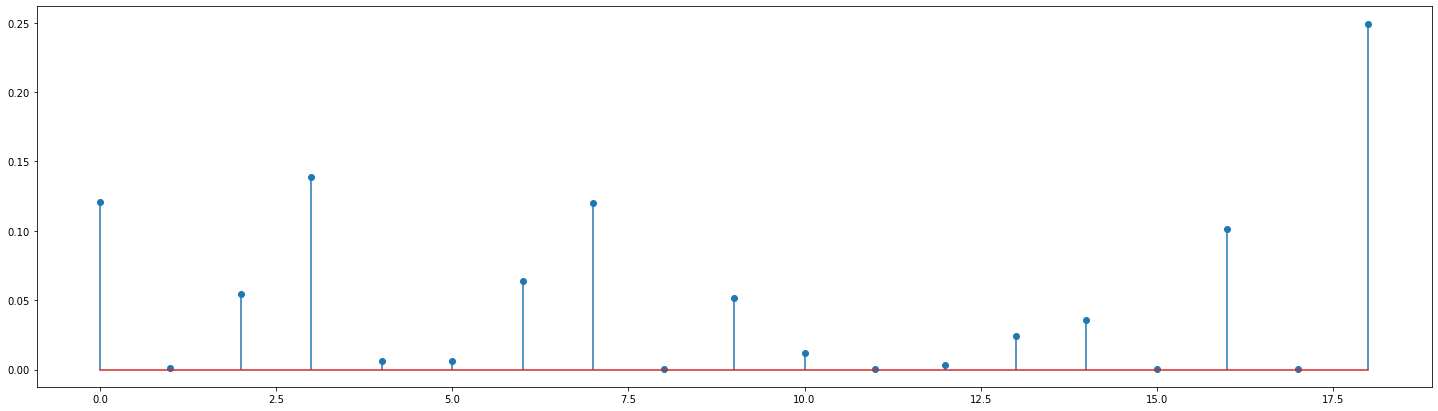

In [57]:
plt.figure(figsize=(25,7))
plt.stem(np.arange(len(delivery3)),np.round(c2,6))


In [58]:
np.argmax(c2),np.max(c2)

(18, 0.24932621731860322)

In [59]:
delivery4=delivery3.drop(18)

In [60]:
delivery4.reset_index()

,index,delivery_time,sorting_time,Log_time,square,Expo_log
0,0,21.00,10,2.302585,3.162278,8.333333
1,1,13.50,4,1.386294,2.000000,3.333333
2,2,19.75,6,1.791759,2.449490,5.000000
3,3,24.00,9,2.197225,3.000000,7.500000
4,4,15.35,6,1.791759,2.449490,5.000000
5,5,19.00,7,1.945910,2.645751,5.833333
6,6,9.50,3,1.098612,1.732051,2.500000
7,7,18.75,9,2.197225,3.000000,7.500000
8,8,19.83,8,2.079442,2.828427,6.666667
9,9,10.75,4,1.386294,2.000000,3.333333


In [61]:
delivery4

,delivery_time,sorting_time,Log_time,square,Expo_log
0,21.00,10,2.302585,3.162278,8.333333
1,13.50,4,1.386294,2.000000,3.333333
2,19.75,6,1.791759,2.449490,5.000000
3,24.00,9,2.197225,3.000000,7.500000
4,15.35,6,1.791759,2.449490,5.000000
5,19.00,7,1.945910,2.645751,5.833333
6,9.50,3,1.098612,1.732051,2.500000
7,18.75,9,2.197225,3.000000,7.500000
8,19.83,8,2.079442,2.828427,6.666667
9,10.75,4,1.386294,2.000000,3.333333


# Iteration 8 

In [62]:
model9=smf.ols("delivery_time~sorting_time",data=delivery4).fit()

In [63]:
model9.rsquared , model9.rsquared_adj

(0.8332330202945817, 0.822810084062993)

In [64]:
# rsquared values = 0.83 
# so the rvalue is good 

# Iteration 9 

In [65]:
model10=smf.ols("delivery_time~sorting_time+Log_time",data=delivery4).fit()

In [66]:
model10.rsquared , model10.rsquared_adj

(0.8444183815377888, 0.8236741657428273)

# Iteration 10 

In [67]:
model11=smf.ols("delivery_time~sorting_time+square",data=delivery4).fit()

In [68]:
model11.rsquared , model11.rsquared_adj


(0.8443606989839327, 0.8236087921817904)

#   So this is our final iteration , rsquare value = 0.8444 , with feature , 
# delivery_time~sorting_time+Log_time / model 10 "

In [69]:
model10.pvalues

Intercept       0.278293
sorting_time    0.435709
Log_time        0.315505
dtype: float64

In [70]:
# Final Model 

Final_model = model10 


In [71]:
Final_model.rsquared , Final_model.rsquared_adj


(0.8444183815377888, 0.8236741657428273)

# END 

  # 2) Salary_hike -> Build a prediction model for Salary_hike

In [72]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [73]:
# import dataset
salary=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Simple Linear Regression\\Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Independent variable -  Experience(x) , Target variable - Salary (y)

# EDA 

In [74]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [75]:
salary.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [76]:
salary.shape

(30, 2)

In [77]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Visualizations

<AxesSubplot:xlabel='Salary', ylabel='Density'>

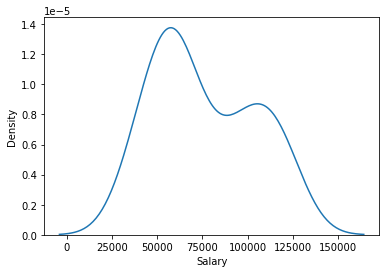

In [78]:
sns.distplot(salary['Salary'],hist=False)
# the data is not normally distributed.

In [79]:
salary['Salary'].skew()

0.35411967922959153

In [80]:
salary['Salary'].kurtosis()

-1.295421086394517

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

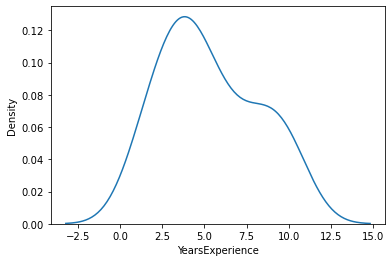

In [81]:
sns.distplot(salary['YearsExperience'],hist=False)
# the data is not normally distributed.

In [82]:
salary['YearsExperience'].skew()

0.37956024064804106

In [83]:
salary['YearsExperience'].kurtosis()

-1.0122119403325072

<AxesSubplot:xlabel='YearsExperience'>

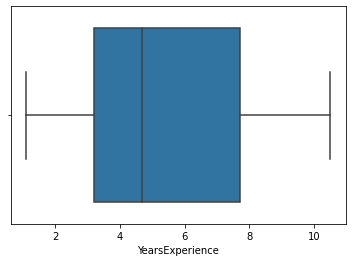

In [84]:
sns.boxplot(salary['YearsExperience'])
# There is no outliers available

<AxesSubplot:xlabel='Salary'>

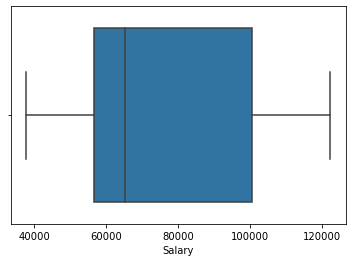

In [85]:
sns.boxplot(salary['Salary'])
# There is no outliers available

# Correlation Analysis

# Below figure show the correction between salary and experince and it is highly correlated as it is near to 1.
# if salary increases , experince also increases and vice-versa.

In [86]:
salary.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

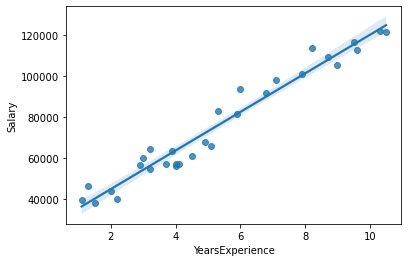

In [87]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

# Drawn Line plot to check the Linearity test.
# From the pot below ,many data points are not falling onto the linear line 

# Fitting a Linear Regression Model

In [88]:
# model = smf.ols("y~x",data=defined_data).fit()   ; ols= ordinary least square method

model=smf.ols("Salary~YearsExperience",data=salary).fit()

# Model Testing

In [89]:
# as Y = Beta0 + Beta1*(X)
# Finding Coefficient Parameters (Beta0 and Beta1 values)
# Here, (Intercept) Beta0 value = 25792.200 & (YearsExperience) Beta1 value = 9449.96

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [90]:
# (Intercept) Beta0:  
# (daily)     Beta1:  
# As (pvalue=0)<(α=0.05); Reject Null hyp . Thus, X(yearsexperience) variable has good slope 
# and variance w.r.t Y(salary) variable. 

print(model.tvalues ,'\n', model.pvalues)


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [91]:
# R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

# Determination Coefficient = rsquared value = 0.9554 ; very good fit = 95.54%


model.rsquared ,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# The R-Squared value is >0.95, hence we can say it's an excellent model and there's no need for any interation.


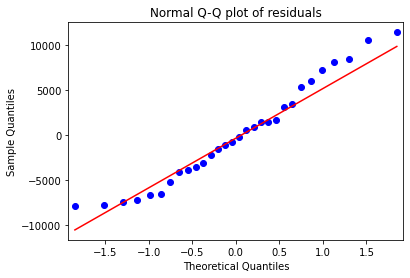

In [92]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Predicting the existing data


In [99]:
predict_data =pd.DataFrame(model.predict(salary),columns=['Predicted_value'])

In [100]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [101]:
new_Data1=pd.concat([salary,predict_data],axis=1)
new_Data1.head()

,YearsExperience,Salary,Predicted_value
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306


In [108]:
Error=pd.DataFrame(new_Data1['Salary']-new_Data1['Predicted_value'],columns=['Error'])

In [111]:
final_data=pd.concat([new_Data1,Error],axis=1)
final_data.head()

,YearsExperience,Salary,Predicted_value,Error
0,1.1,39343,36187.158752,3155.841248
1,1.3,46205,38077.151217,8127.848783
2,1.5,37731,39967.143681,-2236.143681
3,2.0,43525,44692.124842,-1167.124842
4,2.2,39891,46582.117306,-6691.117306


# Predicting the new data


In [140]:
random_data = pd.Series([10,15,20])


In [141]:
random_data=pd.DataFrame(random_data,columns= ['YearsExperience'])
random_data

,YearsExperience
0,10
1,15
2,20


In [142]:
test_result=model.predict(random_data)
test_result

0    120291.823413
1    167541.635020
2    214791.446628
dtype: float64

# END  